# Problem Statement:

The garment industry is a key sector in the global economy, characterized by its labor-intensive nature and dependency on manual processes. To meet the increasing global demand for garment products, it is crucial for garment manufacturing companies to closely monitor and enhance the productivity performance of their workforce. This involves tracking various factors that influence productivity, such as the number of workers, style changes, overtime, incentives, and work interruptions.
This project aims to develop a predictive model using a dataset from the garment industry to analyze and predict the productivity performance of working teams in factories


In [3]:
import pandas as pd 
import numpy as np

In [4]:
df=pd.read_csv("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Final Project//Project 1//garments_worker_productivity.csv")

In [9]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Checking for missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# Filling the missing data
Using mean to fill the mising data since wip is continuous

In [17]:
df['wip'].mean()

1190.2690058479532

In [19]:
df['wip'].fillna(1190, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12824\3799182083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(1190, inplace=True)


In [23]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [25]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [31]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,1190.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,1190.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,1190.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,1190.0,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,1190.0,720,0,0.0,0,0,6.0,0.394722


# Applying scaling to continuous variables

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=['team', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
df[cols]=ss.fit_transform(df[cols])

In [34]:
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,0.454323,0.80,1.014552,-0.058971,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,1.178994
1,1/1/2015,Quarter1,finishing,Thursday,-1.567329,0.75,-1.016778,-0.000193,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0.868096


In [ ]:
df.drop('date', axis=1, inplace=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

# Encoding Categorical Columns

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quarter']=le.fit_transform(df['quarter'])
df['department']=le.fit_transform(df['department'])
df['day']=le.fit_transform(df['day'])

In [47]:
X=df[['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]
Y=df[['actual_productivity']]

# Dividing the data into Training and Testing

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3)

# Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

Y_pred = rf.predict(X_test)

D:\Anaconda_setup\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
print('Random Forest Regressor')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("R-squared:", r2_score(Y_test, Y_pred))

Random Forest Regressor
Mean Squared Error: 0.5003984833451761
Mean Absolute Error: 0.4280733138517086
R-squared: 0.49190018353397214


# XGBoost

In [65]:
import xgboost as xgb

In [67]:
xgb_model = xgb.XGBRegressor(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [69]:
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

D:\Anaconda_setup\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [71]:
print('XGBoost')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred_xgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred_xgb))
print("R-squared:", r2_score(Y_test, Y_pred_xgb))

XGBoost
Mean Squared Error: 0.5111173252342576
Mean Absolute Error: 0.4633418398857566
R-squared: 0.5250506187832721


# KNeighborsRegressor

In [73]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

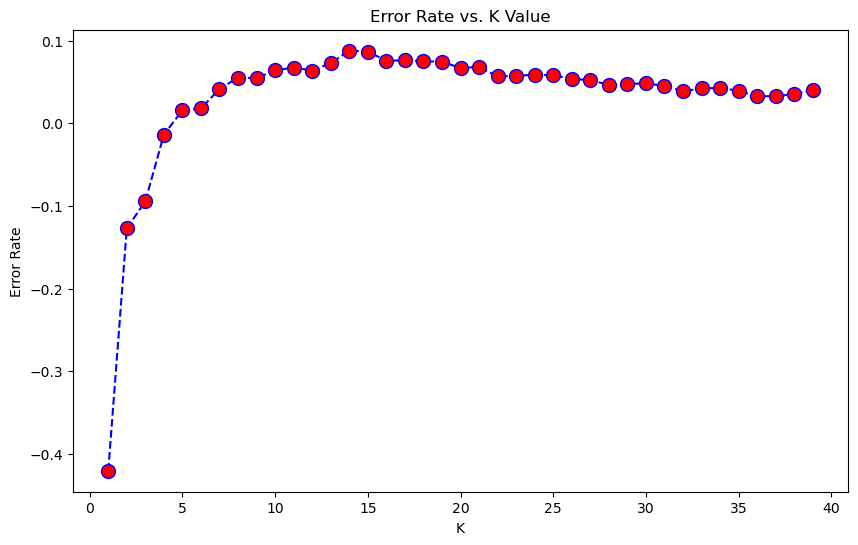

Minimum error:- -0.42026294825737853 at K = 1


In [75]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(1-mean_squared_error(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [77]:
knn = KNeighborsRegressor(n_neighbors=1)

In [79]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=1)

In [81]:
Y_pred2 = knn.predict(X_test)

In [83]:
print('KNeighborsRegressor')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred2))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred2))
print("R-squared:", r2_score(Y_test, Y_pred2))

KNeighborsRegressor
Mean Squared Error: 1.4202629482573785
Mean Absolute Error: 0.8186192573206922
R-squared: -0.31976157945873473


In [85]:
print('Random Forest Regressor')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("R-squared:", r2_score(Y_test, Y_pred))
print('XGBoost')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred_xgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred_xgb))
print("R-squared:", r2_score(Y_test, Y_pred_xgb))
print('KNeighborsRegressor')
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred2))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred2))
print("R-squared:", r2_score(Y_test, Y_pred2))

Random Forest Regressor
Mean Squared Error: 0.47844406095081293
Mean Absolute Error: 0.42360438442703197
R-squared: 0.5554118409285795
XGBoost
Mean Squared Error: 0.5111173252342576
Mean Absolute Error: 0.4633418398857566
R-squared: 0.5250506187832721
KNeighborsRegressor
Mean Squared Error: 1.4202629482573785
Mean Absolute Error: 0.8186192573206922
R-squared: -0.31976157945873473


In [91]:
data = [[0, 2, 3, 0.454323, 0.80, 1.014552,	-0.058971, 0.750589, 0.373414, -0.057473, -0.113005, -0.351617, 1.099229]]
new_test_data = pd.DataFrame(data, columns=['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'])

In [93]:
new_test_data.head(5)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,2,3,0.454323,0.8,1.014552,-0.058971,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229


In [97]:
New_data_pred1 = knn.predict(new_test_data)
New_data_pred1

array([[1.17899449]])

In [99]:
New_data_pred2 = rf.predict(new_test_data)
New_data_pred2

array([1.23130008])

In [102]:
New_data_pred3 = xgb_model.predict(new_test_data)
New_data_pred3

array([1.2709041], dtype=float32)

In [106]:
df.shape

(1197, 14)

# Random Forest Regressor:

#MSE: 0.4784 (Lowest)
#MAE: 0.4236 (Lowest)
## R²: 0.5554 (Best)
## Conclusion: Best performance with lowest errors and highest explained variance.

# Why Random Forest is working best?

Handles Mixed Data: Works well with both categorical and numerical variables.

Captures Non-Linearity: Identifies complex patterns in features like over_time, incentive.

Reduces Overfitting: Averages multiple trees, making it robust to noise and variability in data.

# Business Implications
Enhanced Productivity Prediction: Accurately predicts productivity based on key factors like over_time and no_of_workers, enabling better resource allocation and workforce management.

Improved Decision-Making: Insights from feature importance can help prioritize operational improvements, such as optimizing incentives and reducing idle time to boost efficiency.